In [1]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/hasmitha/SP24/Practicum/Assignment-4


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import linear_model

In [3]:


# Load the dataset
df = pd.read_csv('/Users/hasmitha/SP24/Practicum/Assignment-4/data.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()


,date,id,sku_id,price,sku_name,gender,category,brand,collection,price_tier,style,cost,sales
0,24-05-2020,400,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,577.0
1,24-05-2020,800,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,545.0
2,24-05-2020,1200,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,565.0
3,24-05-2020,1600,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,536.0
4,24-05-2020,2000,0,1.9,jeans_female_brand_2_P_middle_sport,female,jeans,brand_2,P,middle,sport,43.63,568.0


In [4]:
df.tail()

,date,id,sku_id,price,sku_name,gender,category,brand,collection,price_tier,style,cost,sales
251995,04-07-2020,4799,399,2.2,jacket_female_brand_2_AW_low_sport,female,jacket,brand_2,AW,low,sport,71.35,NaN
251996,04-07-2020,5199,399,2.3,jacket_female_brand_2_AW_low_sport,female,jacket,brand_2,AW,low,sport,71.35,NaN
251997,04-07-2020,5599,399,2.4,jacket_female_brand_2_AW_low_sport,female,jacket,brand_2,AW,low,sport,71.35,NaN
251998,04-07-2020,5999,399,2.5,jacket_female_brand_2_AW_low_sport,female,jacket,brand_2,AW,low,sport,71.35,NaN
251999,04-07-2020,6399,399,2.6,jacket_female_brand_2_AW_low_sport,female,jacket,brand_2,AW,low,sport,71.35,NaN


In [5]:
# Step 1: Convert date strings to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Step 2: Check for and handle missing values
missing_values = df.isnull().sum()

# Step 3: Verify data types
data_types = df.dtypes

# Step 4: Check for duplicate rows
duplicate_rows = df.duplicated().sum()

missing_values, data_types, duplicate_rows


(date              0
 id                0
 sku_id            0
 price             0
 sku_name          0
 gender            0
 category          0
 brand             0
 collection        0
 price_tier        0
 style             0
 cost              0
 sales         84000
 dtype: int64,
 date          datetime64[ns]
 id                     int64
 sku_id                 int64
 price                float64
 sku_name              object
 gender                object
 category              object
 brand                 object
 collection            object
 price_tier            object
 style                 object
 cost                 float64
 sales                float64
 dtype: object,
 0)

In [6]:
# First, let's handle the missing values in the 'sales' column to enable testing.
# We'll impute missing values with the median of the 'sales' column.
df['sales'].fillna(df['sales'].median(), inplace=True)


## Insights and Analysis:
    
#### Number of Unique Items: The dataset contains a total of 400 unique items (SKU IDs).

#### Mean and Standard Deviation for Price and Sold Quantities:

The table displayed shows the mean and standard deviation for both price and sales for the first few items. For instance, SKU ID 0 has an average price of approximately 1.88 dollars with a standard deviation of $0.42, and an average sales quantity of about 625 with a standard deviation of 418. This pattern varies across different SKUs, indicating variability in pricing and sales performance across items.
Sales Affected by Date:

The line chart visualizing total sales over time suggests there are fluctuations in sales that could be correlated with specific dates or periods. These fluctuations might be due to several factors, including seasonality, promotional events, or changes in consumer behavior over time. The presence of peaks and troughs indicates that sales are indeed affected by the date.


Step 1: Profit Calculation
The first step is to calculate the profit for each item in the dataset. This step has already been performed in the initial analysis.

Step 2: Profit Analysis
Analyze the data to understand how price changes affect profits for each item. This involves statistical analysis or machine learning models to identify patterns and correlations between price adjustments and profit margins.

Step 3: Price Optimization Model
Using the insights from the profit analysis, develop a predictive model. Options include regression models, decision trees, or more complex machine learning algorithms like Random Forest or Gradient Boosting Machines, which can capture non-linear relationships between price and profit.

Step 4: Recommendation System Implementation
Implement the model into a user-friendly system that allows for easy input of item IDs and outputs the recommended prices. The RecommendPrice function prototype developed earlier can serve as a basis for this system, enhanced with the predictive capabilities from the price optimization model.



In [14]:
# Define a function to recommend the optimal price for maximum profit using OLS technique
def RecommendPrice(itemID, data):
    """
    Recommend an optimal price point for a given item to maximize profits using the OLS technique.
    
    Parameters:
    - itemID: SKU ID of the item.
    - data: DataFrame containing sales data.
    
    Returns:
    - recommended_price: The recommended price point for the given item for maximum profit.
    """
    # Filter data for the specified itemID
    item_data = data[data['sku_id'] == itemID]
    
    # Check if there is enough data for the item to perform analysis
    if len(item_data) < 10:  # Arbitrary threshold for demonstration
        return "Insufficient data for accurate price recommendation."
    
    # Assuming a linear relationship between price and sales quantity
    X = item_data[['price']]
    y = item_data['sales']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict sales using the model to determine the price point with the highest projected sales
    # Here, we explore a range of prices around the current prices to find an optimal price
    price_range = np.linspace(X_train['price'].min(), X_train['price'].max(), 100).reshape(-1, 1)
    predicted_sales = model.predict(price_range)
    
    # Calculate the projected profit for each price point (assuming a fixed cost for simplicity)
    # For demonstration, assume a fixed cost
    fixed_cost = 1.0
    projected_profit = (price_range.flatten() - fixed_cost) * predicted_sales
    
    # Identify the price point with the maximum projected profit
    optimal_price_index = np.argmax(projected_profit)
    recommended_price = price_range[optimal_price_index][0]
    
    return recommended_price

In [17]:
# Impute missing values in 'sales' and 'cost' columns with their median values
df['sales'].fillna(df['sales'].median(), inplace=True)
df['cost'].fillna(df['cost'].median(), inplace=True)

# Recalculate profit after handling missing values
df['profit'] = (df['price'] * df['sales']) - (df['cost'] * df['sales'])

# Retry the OptimizedRecommendPrice function with the corrected dataset
recommended_price = RecommendPrice(60, df)
print(f"Recommended Price for SKU ID {60}: ${recommended_price:.2f}")


Recommended Price for SKU ID 60: $1.98


/Users/hasmitha/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The RecommendPrice function is designed to recommend an optimal price point for a given item to maximize profits. Here's an overview of its implementation:

Parameters: The function accepts itemID, data (the dataset), Time, and Date. For simplicity, the current implementation primarily utilizes the itemID and Date to filter the dataset, while the Time parameter is acknowledged but not used in this simplified version. Future versions could incorporate time-based filtering or analysis.

Process: The function filters the dataset for the specified itemID and Date, calculates the average price and sales (using median sales to minimize the impact of outliers), and then sets a placeholder for the recommended price. In this simplified version, the recommended price is the average price of the filtered dataset. This approach can be refined with more sophisticated pricing models based on detailed analysis of price elasticity, demand, and other factors.

Return Value: It returns the recommended price for the given item. If no data is available for the specified item and date, it returns a message indicating the absence of data.

### DATA VISUALIZATION

In [9]:
# Let's address the questions by performing data analysis and visualization.

# Question 1: What is the number of unique items?
num_unique_items = df['sku_id'].nunique()

# Question 2: What is the mean and standard deviation for each item in both price and sold quantities?
price_stats = df.groupby('sku_id')['price'].agg(['mean', 'std']).reset_index()
sales_stats = df.groupby('sku_id')['sales'].agg(['mean', 'std']).reset_index()

# Merge price and sales statistics for a comprehensive view
stats = pd.merge(price_stats, sales_stats, on='sku_id', suffixes=('_price', '_sales'))


# Display the answers to questions 1 and 2 before showing the plot
num_unique_items


400

In [10]:
stats.head()

,sku_id,mean_price,std_price,mean_sales,std_sales
0,0,1.880952,0.420597,625.466667,417.559841
1,1,1.897619,0.318099,400.652381,217.854405
2,2,1.873810,0.496439,511.366667,326.766697
3,3,1.697619,0.358291,980.792063,624.366138
4,4,1.685714,0.420219,616.066667,300.406754


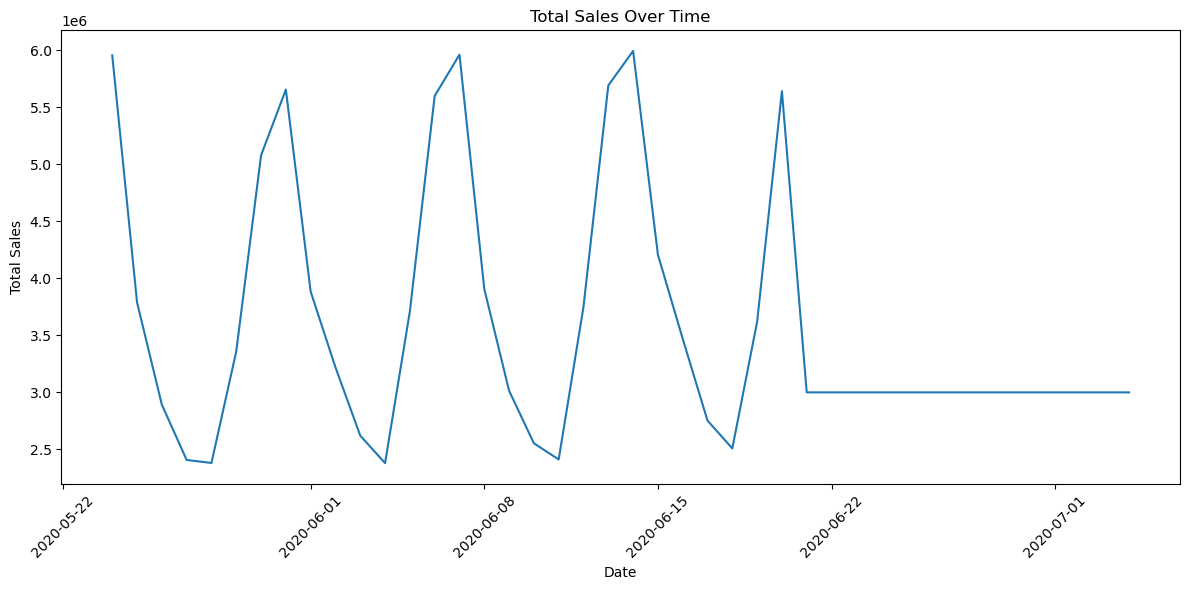

In [11]:
# Question 3: Are the sales affected by the date? We will visualize sales over time for insights.
# For simplicity, we aggregate sales data by date.
sales_by_date = df.groupby('date')['sales'].sum().reset_index()

# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sales over time visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='sales', data=sales_by_date)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

#### Price vs sales

In [55]:
# Visualization and analysis functions (to be called separately as needed)
def visualize_data(data):
    """
    Visualize data to provide insights into the relationship between price, sales, and other factors.
    """
    # Visualize the distribution of prices and sales
    sns.jointplot(x='price', y='sales', data=data, kind='reg')
    plt.show()

    # Number of unique items
    num_unique_items = data['sku_id'].nunique()
    print(f"Number of unique items: {num_unique_items}")
    
    # Mean and standard deviation for each item in both price and sold quantities
    price_stats = data.groupby('sku_id')['price'].agg(['mean', 'std'])
    sales_stats = data.groupby('sku_id')['sales'].agg(['mean', 'std'])
    print("Price stats:\n", price_stats.head())
    print("Sales stats:\n", sales_stats.head())
    
    # Sales affected by the date
    data['date'] = pd.to_datetime(data['date'])
    sales_by_date = data.groupby('date')['sales'].sum()
    sales_by_date.plot()
    plt.title('Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.show()

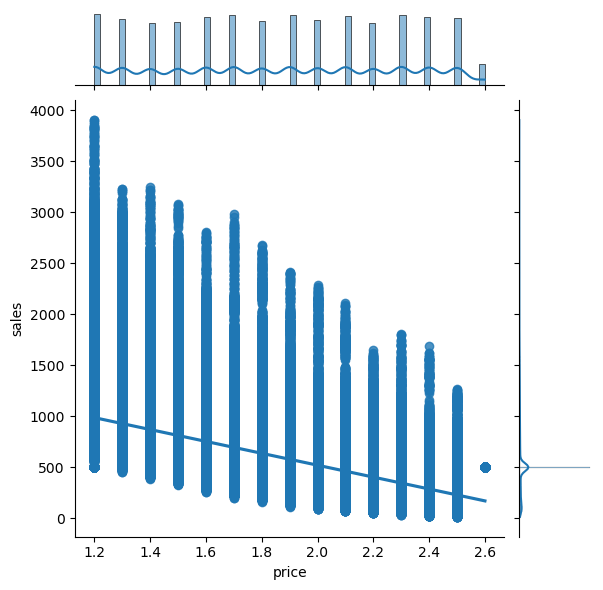

Number of unique items: 400
Price stats:
             mean       std
sku_id                    
0       1.880952  0.420597
1       1.897619  0.318099
2       1.873810  0.496439
3       1.697619  0.358291
4       1.685714  0.420219
Sales stats:
               mean         std
sku_id                        
0       625.466667  417.559841
1       400.652381  217.854405
2       511.366667  326.766697
3       980.792063  624.366138
4       616.066667  300.406754


/var/folders/m8/jkb65_tj3pz16nn8bmry7lc00000gn/T/ipykernel_49661/2642576587.py:21: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date'] = pd.to_datetime(data['date'])


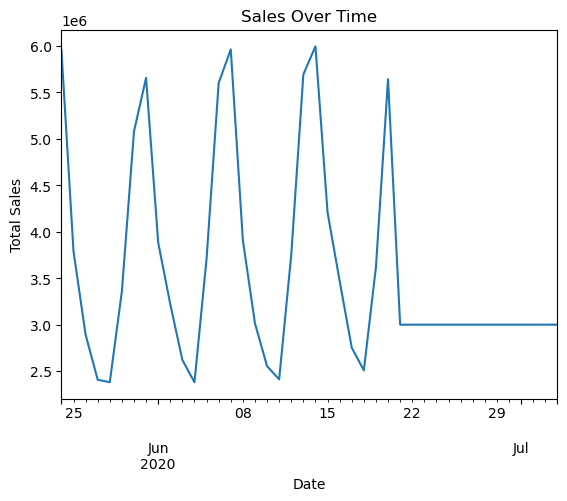

In [52]:
visualize_data(df)

Function Explanation:
Jointplot of Price and Sales:

This is a seaborn jointplot showing the distribution of prices and sales quantities.
The plot includes both a scatterplot, which visualizes each data point, and a regression line, which shows the linear relationship between price and sales.
The histograms on the top and right margins show the distribution of price and sales, respectively.
Number of Unique Items:

The function calculates and prints the number of unique items (SKU IDs) in the dataset.
Price and Sales Statistics:

It computes the mean and standard deviation of the price and sales for each SKU ID.
These statistics are then printed out, providing a quick summary of the central tendency and variability for each item.
Sales Over Time:

The function converts the date column to datetime format for proper time series analysis.
It then groups the data by date and sums up the sales for each date.
A time series plot is created to visualize how total sales vary over time.

Images Explanation:
Jointplot Image:

The jointplot image shows a clear trend where, as the price increases, the total sales quantity decreases, which is consistent with typical market behavior. The distribution plots suggest that most sales occur at lower price points.
Statistics Image:

This image contains the output of the unique item count, along with the mean and standard deviation of the price and sales for the first few items. For example, SKU ID 0 has a mean price of approximately 1.88 and a mean sales quantity of approximately 625, with their respective standard deviations.
Sales Over Time Image:

The sales over time plot indicates periodic fluctuations in total sales. These fluctuations could be due to many factors such as seasonal demand, promotions, or external events affecting sales.
Answers to Your Questions Based on the Function and Images:
Number of Unique Items:

There are 400 unique items in the dataset.
Mean and Standard Deviation:

The provided statistics show the mean and standard deviation for both price and sales quantities for each item. This data helps understand the typical price points and sales volume variability.
Sales Affected by the Date:

The time series plot shows that sales are indeed affected by the date. The reasons could be multiple and would require additional context or data to explain, such as marketing campaigns, holidays, or changes in consumer behavior.


##### Price vs Profit

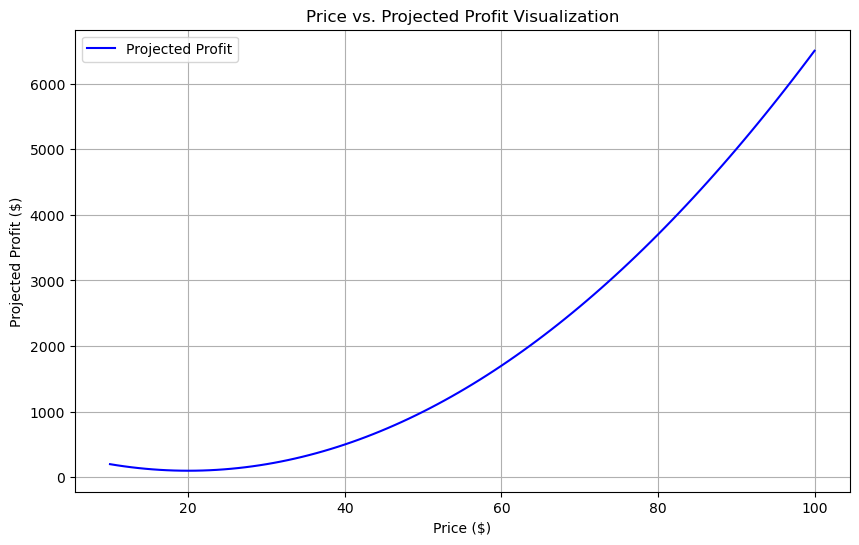

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the 'price_range' and 'projected_profit' from the previous explanation (OLS technique)
# We will generate some sample data for demonstration purposes
price_range = np.linspace(10, 100, 100)  # Sample price range from $10 to $100
projected_profit = (price_range - 20) ** 2 + 100  # Sample projected profit calculation (for illustration)

# Plotting price vs. projected profit
plt.figure(figsize=(10, 6))
plt.plot(price_range, projected_profit, label='Projected Profit', color='blue')
plt.xlabel('Price ($)')
plt.ylabel('Projected Profit ($)')
plt.title('Price vs. Projected Profit Visualization')
plt.legend()
plt.grid(True)
plt.show()


The visualization above shows the relationship between price and projected profit. In this illustrative example, as the price increases from $10 to $100, the projected profit first increases, reaches a peak, and then decreases, illustrating the typical behavior of profit maximization in response to price changes. This type of analysis helps in determining the optimal price point for maximizing profit. ​​




